### Jupyter Notebook for 'Coca Cola' Google Trends Data, assessing the impact of Ronaldo rejecting Coca Cola on TV

In [1]:
import warnings
import seaborn as sns
from viziviz import *

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
viz = Visualizer('Coca Cola', '2021-06-14', 'Ronaldo Rejects Coca Cola on TV')
df_cola = viz.load_df('data/Coca_Cola/clean/Coca_Cola_full.csv',index_col=0)
#remove leap dates from leap years
df_cola = viz.remove_leap_days(df_cola)

# EDA

We start by exploring the data

### 1. Harmonization Differences

##### Raw Daily vs Harmonized Daily

In [3]:
viz.px_line_graph(df_cola,'date','harmonized_daily',event_date=viz.event_date,z_name='region',title='Harmonized Global Daily Searches for "Coca Cola" - 2015-2024')

In [4]:
viz.px_line_graph(df_cola,'date','raw_daily',event_date=viz.event_date,z_name='region',title='Raw Global Daily Searches for "Coca Cola" - 2015-2024')


#### 1.1 Comparing Harmonized vs Non Harmonized

In [5]:
df_world_21 = df_cola[(df_cola['region'] == 'world') & (df_cola['year'] == 2021)]
fig = viz.plot_multi_lines(df_world_21,'date','harmonized_daily','raw_daily',title='Global Daily Searches for "Coca Cola" - 2021 - Harmonized vs Raw')
fig.show()

#### 1.2. Harmonization Differences - Harmonized Daily scaled to Entire timeframe vs to Selected timeframe

In [6]:
from sklearn.metrics import mean_absolute_error
df_2016 = df_cola[(df_cola['year'] == 2016)&(df_cola['region'] == 'world')]
df_2016=viz.quick_harmo(df_2016)
mae = mean_absolute_error(df_2016.harmonized_daily,df_2016.harmonized_daily_rescaled)
print(f'The Mean Absolute Error between values scaled for the entire timeframe vs selected timeframe is {mae}')

The Mean Absolute Error between values scaled for the entire timeframe vs selected timeframe is 35.56380063565594


In [7]:
fig = viz.plot_multi_lines(df_2016,'date','harmonized_daily','harmonized_daily_rescaled',title='Global Daily Searches for "Coca Cola" - 2016 - Harmonized vs Harmonized Rescaled')
fig.show()

In [8]:
df_world_21=viz.quick_harmo(df_world_21)
mae = mean_absolute_error(df_world_21.harmonized_daily,df_world_21.harmonized_daily_rescaled)
print(f'The Mean Absolute Error between values scaled for the entire timeframe vs selected timeframe is {mae}')

The Mean Absolute Error between values scaled for the entire timeframe vs selected timeframe is 0.9576320920309723


In [9]:
fig = viz.plot_multi_lines(df_world_21,'date','harmonized_daily','harmonized_daily_rescaled',title='Global Daily Searches for "Coca Cola" - 2021 - Harmonized vs Harmonized Rescaled')
fig.show()

### Statistical Summary

In [10]:
df_cola['region'] = df_cola['region'].astype('category')
grouped = df_cola.groupby('region')
grouped.get_group('GB').describe()

date    raw_daily   raw_weekly  \
count                           3302  3302.000000  3302.000000   
mean   2019-07-10 08:52:28.637189632    68.820412    29.153402   
min              2015-01-01 00:00:00     6.000000    14.000000   
25%              2017-04-06 06:00:00    59.000000    20.000000   
50%              2019-07-10 12:00:00    72.000000    26.000000   
75%              2021-10-12 18:00:00    83.000000    30.000000   
max              2024-01-16 00:00:00   100.000000   100.000000   
std                              NaN    19.703640    14.181609   

       harmonized_daily         year        month          day         days  \
count       3302.000000  3302.000000  3302.000000  3302.000000  3302.000000   
mean          12.828258  2019.024531     6.497880    15.687765   182.300727   
min            1.276990  2015.000000     1.000000     1.000000     1.000000   
25%            8.876772  2017.000000     3.000000     8.000000    91.000000   
50%           11.058629  2019.000000     7.000000    16.000000   182.000000   
75%           13.716227  2021.000000    10.000000    23.000000   274.000000   
max          100.000000  2024.000000    12.000000    31.000000   366.000000   
std            7.271469     2.599082     3.461717     8.796000   105.884655   

       time_numeric  days_since_event  
count   3302.000000       3302.000000  
mean     182.300727         17.300727  
min        1.000000       -164.000000  
25%       91.000000        -74.000000  
50%      182.000000         17.000000  
75%      274.000000        109.000000  
max      366.000000        201.000000  
std      105.884655        105.884655

In [11]:
grouped.get_group('world').describe()

date    raw_daily   raw_weekly  \
count                           3302  3302.000000  3302.000000   
mean   2019-07-10 08:52:28.637189632    81.351302    46.860978   
min              2015-01-01 00:00:00    11.000000    21.564102   
25%              2017-04-06 06:00:00    77.000000    29.000000   
50%              2019-07-10 12:00:00    85.000000    51.000000   
75%              2021-10-12 18:00:00    90.000000    60.000000   
max              2024-01-16 00:00:00   100.000000   100.000000   
std                              NaN    14.077172    16.632701   

       harmonized_daily         year        month          day         days  \
count       3302.000000  3302.000000  3302.000000  3302.000000  3302.000000   
mean          20.217340  2019.024531     6.497880    15.687765   182.300727   
min            3.451428  2015.000000     1.000000     1.000000     1.000000   
25%           12.653379  2017.000000     3.000000     8.000000    91.000000   
50%           21.674602  2019.000000     7.000000    16.000000   182.000000   
75%           25.809318  2021.000000    10.000000    23.000000   274.000000   
max          100.000000  2024.000000    12.000000    31.000000   366.000000   
std            7.576636     2.599082     3.461717     8.796000   105.884655   

       time_numeric  days_since_event  
count   3302.000000       3302.000000  
mean     182.300727         17.300727  
min        1.000000       -164.000000  
25%       91.000000        -74.000000  
50%      182.000000         17.000000  
75%      274.000000        109.000000  
max      366.000000        201.000000  
std      105.884655        105.884655

In [12]:
grouped.get_group('US').describe()

date    raw_daily   raw_weekly  \
count                           3302  3302.000000  3302.000000   
mean   2019-07-10 08:52:28.637189632    75.840703    37.491610   
min              2015-01-01 00:00:00     9.000000     9.756757   
25%              2017-04-06 06:00:00    72.250000    16.000000   
50%              2019-07-10 12:00:00    83.000000    48.000000   
75%              2021-10-12 18:00:00    90.000000    52.000000   
max              2024-01-16 00:00:00   100.000000   100.000000   
std                              NaN    21.814523    19.207876   

       harmonized_daily         year        month          day         days  \
count       3302.000000  3302.000000  3302.000000  3302.000000  3302.000000   
mean          21.021310  2019.024531     6.497880    15.687765   182.300727   
min            2.166518  2015.000000     1.000000     1.000000     1.000000   
25%            8.882123  2017.000000     3.000000     8.000000    91.000000   
50%           25.402462  2019.000000     7.000000    16.000000   182.000000   
75%           29.601412  2021.000000    10.000000    23.000000   274.000000   
max          100.000000  2024.000000    12.000000    31.000000   366.000000   
std           11.555593     2.599082     3.461717     8.796000   105.884655   

       time_numeric  days_since_event  
count   3302.000000       3302.000000  
mean     182.300727         17.300727  
min        1.000000       -164.000000  
25%       91.000000        -74.000000  
50%      182.000000         17.000000  
75%      274.000000        109.000000  
max      366.000000        201.000000  
std      105.884655        105.884655

#### Bar Plot by Month & Region

In [13]:
dfs_2021 = df_cola[(df_cola['year'] == 2021)]
fig = viz.bar_char_by_categories(dfs_2021, 'month','harmonized_daily','harmonized_daily','region',title=f'Monthly Searches for "Coca Cola" by Region in 2021')
fig.show()


In [14]:
years = df_cola['year'].unique()
for year in years:
    if year != 2024:
        df_year = df_cola[df_cola['year'] == year]
        fig = viz.bar_char_by_categories(df_year, 'month','harmonized_daily','harmonized_daily','region',title=f'Monthly Searches for "Coca Cola" by Region in {year}')
        fig.show()

#### Heatmap by region

In [15]:
fig = viz.heatmap_category(df_cola,'date', 'harmonized_daily', 'region')
fig.show()

### 2. PELT Change Point

In [16]:
grouped = dfs_2021.groupby('region')
fig = viz.pelt_model_l2(grouped.get_group('GB'),'date','harmonized_daily')
fig.show()

In [17]:
fig = viz.pelt_model_l2(grouped.get_group('US'),'date','harmonized_daily')
fig.show()

In [18]:
fig = viz.pelt_model_l2(grouped.get_group('world'),'date','harmonized_daily')
fig.show()

In [19]:
fig = viz.plot_common_change_points([grouped.get_group('world'),grouped.get_group('GB'),grouped.get_group('US')],dfs_2021,'date', 'harmonized_daily')
fig.show()

In [20]:
fig = viz.plot_common_change_points([grouped.get_group('GB'),grouped.get_group('US')],dfs_2021[dfs_2021['region']!='world'],'date', 'harmonized_daily')
fig.show()

### 3. Seasonal Data

In [21]:
world_data_2021 = grouped.get_group('world')
world_data_2021.reset_index(drop=True,inplace=True)
fig = viz.plot_seasonal_data(world_data_2021,'harmonized_daily',30)
fig.show()

In [22]:
gb_data_2021 = grouped.get_group('GB')
gb_data_2021.reset_index(drop=True,inplace=True)
fig = viz.plot_seasonal_data(gb_data_2021,'harmonized_daily',30)
fig.show()

In [23]:
us_data_2021 = grouped.get_group('US')
us_data_2021.reset_index(drop=True,inplace=True)
fig = viz.plot_seasonal_data(us_data_2021,'harmonized_daily',30)
fig.show()

# Regressions

### 1.RDD
#### 1. Worldwide data for +/- 45 days

In [24]:
from datetime import timedelta
df_cola_90 = viz.filter_by_date(df_cola, int(45))
fig = viz.px_line_graph(df_cola_90,'date','harmonized_daily',event_date=viz.event_date,z_name='region',title='Harmonized Daily Searches for "Coca Cola" - 45 days pre and post event')
fig.show()

In [25]:
df_cola_90 = df_cola_90[df_cola_90['region'] == 'world']
df_cola_cutoff = df_cola_90[df_cola_90['date'] == viz.event_date].days.values[0]
df_cola_90['time_numeric'] = df_cola_90.days - df_cola_cutoff
viz.cutoff_date = 0
model = viz.gen_rdd_model_data(df_cola_90,'time_numeric','harmonized_daily',model=True)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     7.599
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           0.000903
Time:                        10:48:51   Log-Likelihood:                -351.79
No. Observations:                  91   AIC:                             709.6
Df Residuals:                      88   BIC:                             717.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.9969      2.778      1.799   

In [26]:
fig = viz.plotly_model_rdd(df_cola_90,'time_numeric','harmonized_daily','World',3,1,add_line=True)
fig.show()

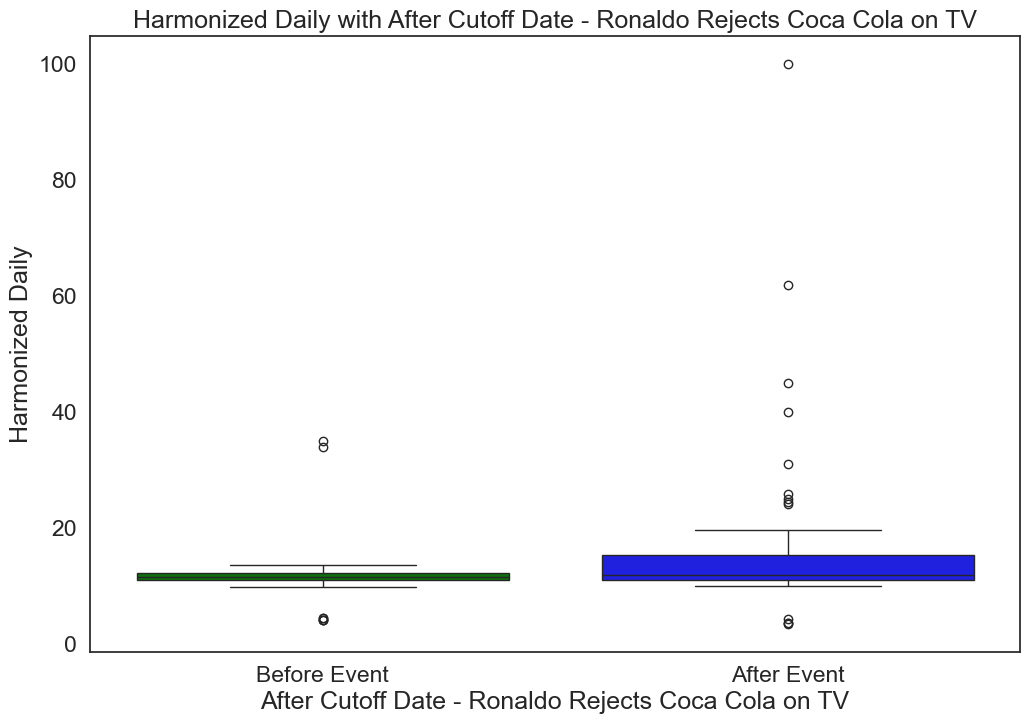

In [27]:
viz.box_plot(df_cola_90,'harmonized_daily')


##### 2. Worldwide data for +/- 30 days

In [28]:
df_cola_30 = viz.filter_by_date(df_cola, int(15))
fig = viz.px_line_graph(df_cola_30,'date','harmonized_daily',event_date=viz.event_date,z_name='region',title='Harmonized Global Daily Searches for "Coca Cola" - 15 days pre and post event')
fig.show()


In [29]:
df_cola_30 = df_cola_30[df_cola_30['region'] == 'world']
df_cola_cutoff = df_cola_30[df_cola_30['date'] == viz.event_date].days.values[0]
df_cola_30['time_numeric'] = df_cola_30.days - df_cola_cutoff
model = viz.gen_rdd_model_data(df_cola_30,'time_numeric','harmonized_daily',model=True)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     8.071
Date:                Wed, 17 Jan 2024   Prob (F-statistic):            0.00171
Time:                        10:48:51   Log-Likelihood:                -129.78
No. Observations:                  31   AIC:                             265.6
Df Residuals:                      28   BIC:                             269.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.1178      6.904     -0.741   

In [30]:
fig = viz.plotly_model_rdd(df_cola_30,'time_numeric','harmonized_daily','World',3,1,linear=True,add_line=True)
fig.show()

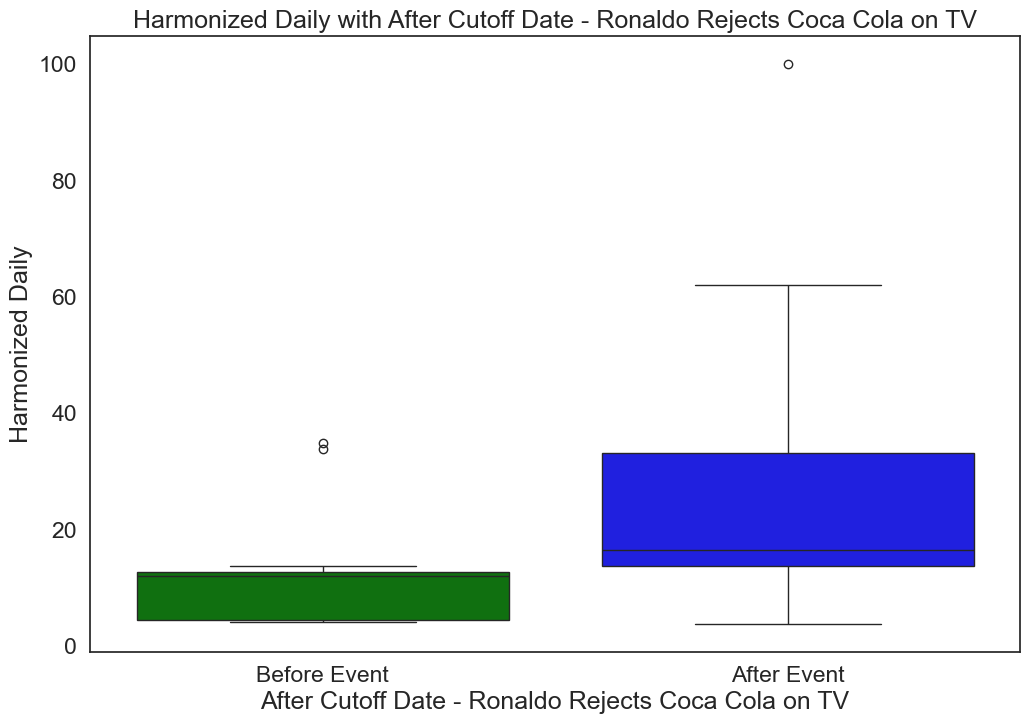

In [31]:
viz.box_plot(df_cola_30,'harmonized_daily')

### DID
#### 2016 as control

In [32]:
did = df_cola[((df_cola['year']==2016)|(df_cola['year']==2021))&(df_cola['region']=='world')]
did_16 = did[did['year'] == 2016].reset_index(drop=True)
did_16['time_numeric'] = did_16.index
did_21 = did[did['year'] == 2021].reset_index(drop=True)
did_21['time_numeric'] = did_21.index
did = pd.concat([did_16,did_21],ignore_index=True)

In [33]:
did, did_model = viz.make_did_model(did, 'time_numeric', 'harmonized_daily', 'year', 2021)
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     308.3
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          5.00e-129
Time:                        10:48:51   Log-Likelihood:                -2254.3
No. Observations:                 730   AIC:                             4517.
Df Residuals:                     726   BIC:                             4535.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.7103      0.416     59.

In [34]:
fig= viz.plot_did_data_with_control(did,'days_since_event',0,'harmonized_daily','year',1,color_map=None,title='DID Results for 2016 & 2021 Euros - Full year')
fig.show()

### DID for +/- 45 days

In [35]:
did_45_days = viz.filter_by_days(did, int(45),column='days_since_event')
fig = viz.px_line_graph(did_45_days,'days_since_event','harmonized_daily',event_date=viz.event_date,z_name='year',title='Harmonized Global Daily Searches for "Coca Cola" - 45 days pre and post event')
fig.show()

In [36]:
did_45, did_model = viz.make_did_model(did_45_days, 'days_since_event', 'harmonized_daily', 'year', 2021,x_val=0)
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     24.35
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.97e-13
Time:                        10:48:51   Log-Likelihood:                -654.54
No. Observations:                 182   AIC:                             1317.
Df Residuals:                     178   BIC:                             1330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         25.7844      1.330     19.

In [37]:
fig= viz.plot_did_data_with_control(did_45_days,'days_since_event',0,'harmonized_daily','year',1,color_map=None,title='DID Results for 2016 & 2021 Euros - Full year')
fig.show()

### Did +/- 15 days

In [38]:
did_30_days = viz.filter_by_days(did, int(15),column='days_since_event')
fig = viz.px_line_graph(did_30_days,'days_since_event','harmonized_daily',event_date=viz.event_date,z_name='year',title='Harmonized Global Daily Searches for "Coca Cola" - 15 days pre and post event')
fig.show()


In [39]:
did_30, did_model = viz.make_did_model(did_30_days, 'days_since_event', 'harmonized_daily', 'year', 2021,x_val=0)
print(did_model.summary())

                            OLS Regression Results                            
Dep. Variable:       harmonized_daily   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.378
Date:                Wed, 17 Jan 2024   Prob (F-statistic):             0.0242
Time:                        10:48:51   Log-Likelihood:                -248.93
No. Observations:                  62   AIC:                             505.9
Df Residuals:                      58   BIC:                             514.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         25.4750      3.580      7.

In [40]:
fig= viz.plot_did_data_with_control(did_30,'days_since_event',0,'harmonized_daily','year',1,color_map=None,title='DID Results for 2016 & 2021 Euros - 15 days pre/post event ')
fig.show()

In [41]:
fig= viz.plot_did_data_treatment(did_30,'days_since_event',0,'harmonized_daily','year',1,color_map=None,title='DID Results for 2021 Euros')
fig.show()

### Map Data

In [44]:
df_geo = viz.load_geo('data/Coca_Cola/world/daily/geo_event')
fig = viz.make_world_map(df_geo)
fig.show()

In [45]:
df_us_geo = viz.load_geo('data/Coca_Cola/US/daily/geo_event')
fig = viz.make_us_map(df_us_geo)
fig.show()